In [11]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('GIS.csv')

In [15]:
df

,name,description,latitude,longitude,colour
0,宮島,行ってみたい観光スポット,34.392846,132.452266,orange
1,ホテルエスプル広島平和公園,Sakiが前泊するホテル,34.389116,132.456216,orange
2,広島現代美術館,"Saki,Misuzu,Riria,Karenが金曜日に行く場所",34.386263,132.473582,green
3,広島テレビ,前泊メンバーでインタビュー,34.400276,132.475669,green
4,原爆ドーム,資料館拝観、Dialogue,34.395638,132.453603,green


In [16]:
df.shape

(5, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5 non-null      object 
 1   description  5 non-null      object 
 2   latitude     5 non-null      float64
 3   longitude    5 non-null      float64
 4   colour       5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes


In [18]:
df.columns.to_list()

['name', 'description', 'latitude', 'longitude', 'colour']

In [19]:
df[['name','latitude','longitude']]

,name,latitude,longitude
0,宮島,34.392846,132.452266
1,ホテルエスプル広島平和公園,34.389116,132.456216
2,広島現代美術館,34.386263,132.473582
3,広島テレビ,34.400276,132.475669
4,原爆ドーム,34.395638,132.453603


In [20]:
df['longitude']

0    132.452266
1    132.456216
2    132.473582
3    132.475669
4    132.453603
Name: longitude, dtype: float64

In [21]:
df['latitude'].to_list()

[34.39284603, 34.38911573, 34.38626261, 34.400276, 34.3956379]

<Axes: >

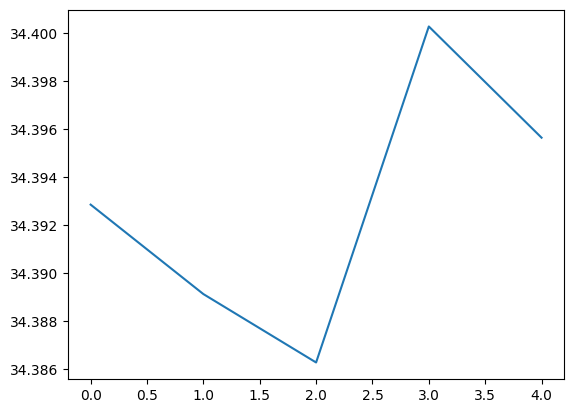

In [22]:
df['latitude'].plot()

<Axes: >

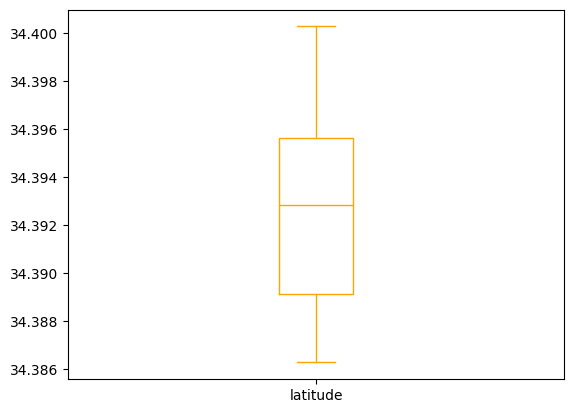

In [23]:
df['latitude'].plot.box(color='orange')

<Axes: >

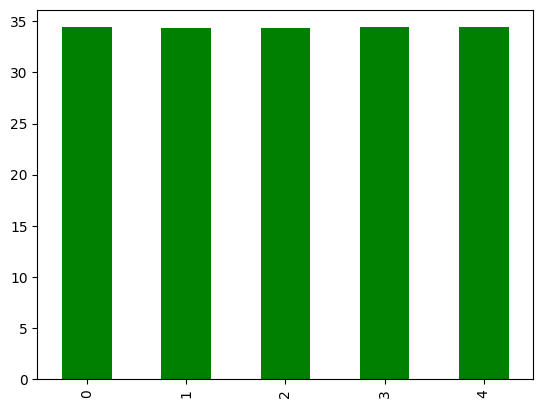

In [24]:
df['latitude'].plot.bar(color='green')

<Axes: xlabel='longitude', ylabel='latitude'>

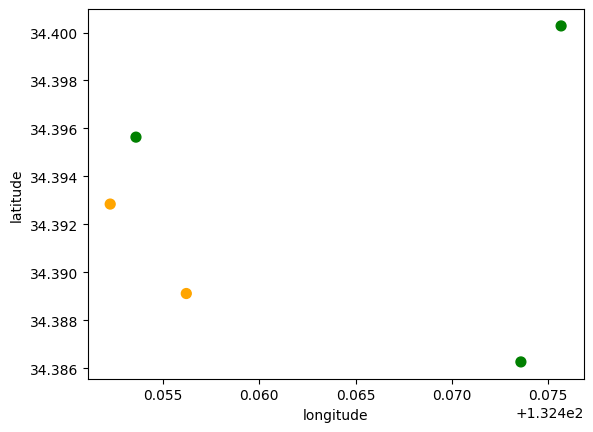

In [28]:
df.plot.scatter(x='longitude',y='latitude',c='colour',s=50)

In [29]:
df['latitude'].describe()

count     5.000000
mean     34.392828
std       0.005483
min      34.386263
25%      34.389116
50%      34.392846
75%      34.395638
max      34.400276
Name: latitude, dtype: float64

In [30]:
df['longitude'].describe()

count      5.000000
mean     132.462267
std        0.011395
min      132.452266
25%      132.453603
50%      132.456216
75%      132.473582
max      132.475669
Name: longitude, dtype: float64

In [31]:
df['latitude'].mean()

34.392827654

In [32]:
df['latitude'].median()

34.39284603

In [33]:
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

print(center_lat,center_lon)

34.392827654 132.46226698


In [34]:
numbers = [1,2,3,4]

for num in numbers:
    print(num*num)

1
4
9
16


In [36]:
students = ['Saki','Misuzu',]
for name in students:
    print (name)

Saki
Misuzu


In [37]:
for index, row in df.iterrows():
    print(row['name'])

宮島
ホテルエスプル広島平和公園
広島現代美術館
広島テレビ
原爆ドーム


In [38]:
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

宮島 34.39284603 132.4522656
ホテルエスプル広島平和公園 34.38911573 132.4562155
広島現代美術館 34.38626261 132.4735821
広島テレビ 34.400276 132.475669
原爆ドーム 34.3956379 132.4536027


In [41]:
m = folium.Map(location=[center_lat,center_lon], zoom_start=17)

for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['colour']
                )).add_to(m)

m

In [42]:
m.save("map.html")